**exercises with statsmodels OLS and WLS**
*created by fbb November 2018*
* Author : Shijia Gu

In [55]:
from __future__ import print_function, division
import pylab as pl

import os
import json

import statsmodels.api as sm
import statsmodels.formula.api as smf

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [56]:
def errors(x):
    return np.sqrt(x)
    

def line(a, x, b=0, errors=None):
    '''
    creates a line from parameters and exogenous variable
    a: slope
    x: exogenous variable
    b: intercept - default 0
    errors: add uncertainties (sqrt(N) - default True)
    '''
    np.random.randn(123)
    if errors is None:
        return a*x + b 
    else:
        return a*x + b + np.random.randn(len(x)) * errors(x)
    


# 1. create a line with a chosen slope and intercept = 0 and plot it with uncertainties as errorbars

use the functions created above

Text(0,0.5,'endogenous')

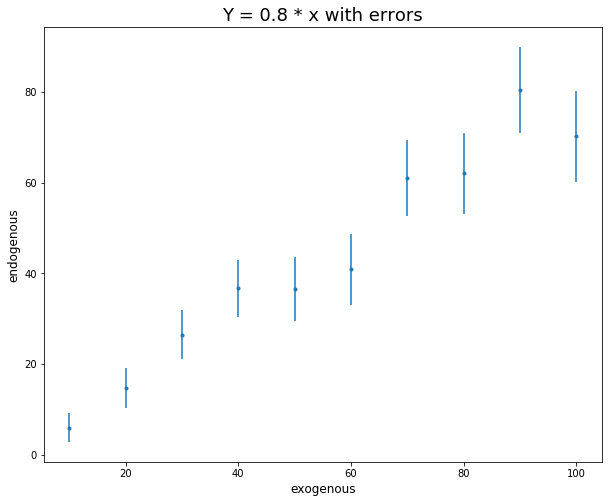

In [75]:
slope = 0.8
intercept = 0
x = np.linspace(10,100,10)
y = line(slope, x, b=intercept, errors=errors)
plt.figure(figsize=(10, 8))
# plt.errorbar(x, y, yerr=None, xerr=None, fmt='', ecolor=None, elinewidth=None, capsize=None, barsabove=False, lolims=False, uplims=False, xlolims=False, xuplims=False, errorevery=1, capthick=None, hold=None, data=None, **kwargs)
plt.errorbar(x, y, yerr=[errors(xx) for xx in x], fmt='.')
plt.title("Y = %s * x with errors"%(slope), fontsize=18)
plt.xlabel("exogenous", fontsize=12)
plt.ylabel("endogenous", fontsize=12)

# 2. print y, x, and the result of applying statsmodels.api.add_constant() to x

In [58]:
print(y)

[  9.61538466   9.21445244  18.04217443  41.59515237  38.06508871
  40.81889146  60.2935988   72.1933052   81.61824032  83.5734711 ]


In [59]:
print(x)

[  10.   20.   30.   40.   50.   60.   70.   80.   90.  100.]


In [60]:
sm.add_constant(x)

array([[   1.,   10.],
       [   1.,   20.],
       [   1.,   30.],
       [   1.,   40.],
       [   1.,   50.],
       [   1.,   60.],
       [   1.,   70.],
       [   1.,   80.],
       [   1.,   90.],
       [   1.,  100.]])

# 3. use statsmodels.api.OLS to fit x and y 
- a. *the wrong way*: by passing x as exogenous variable
- b. *the right way*: by passing statsmodels.api.add_constant(x) as exogenous variable

# and print the model summary for each and discuss the differences

In [61]:
#THE WRONG WAY
smfitW = smf.OLS(y, x).fit()
smfitW.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     719.4
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           6.74e-10
Time:                        22:41:25   Log-Likelihood:                -31.880
No. Observations:                  10   AIC:                             65.76
Df Residuals:                       9   BIC:                             66.06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             0.8451      0.032     26.821      0.000         0.774     0.916
==============================================================================
Omnibus:                        1.484   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.476   Jarque-Bera (JB):                0.737
Skew:                          -0.078   Prob(JB):                        0.692
Kurtosis:                       1.679   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
#THE RIGHT WAY
smfitR = smf.OLS(y, sm.add_constant(x)).fit()
smfitR.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     182.7
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           8.61e-07
Time:                        22:41:26   Log-Likelihood:                -31.185
No. Observations:                  10   AIC:                             66.37
Df Residuals:                       8   BIC:                             66.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -4.5655      4.179     -1.093      0.306       -14.202     5.071
x1             0.9103      0.067     13.517      0.000         0.755     1.066
==============================================================================
Omnibus:                        0.201   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.904   Jarque-Bera (JB):                0.378
Skew:                           0.103   Prob(JB):                        0.828
Kurtosis:                       2.070   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

R-squared in the right model is less than the one in the wrong model.

# 4. plot the data (as points) and both statsmodels fits

Text(0,0.5,'endogenous')

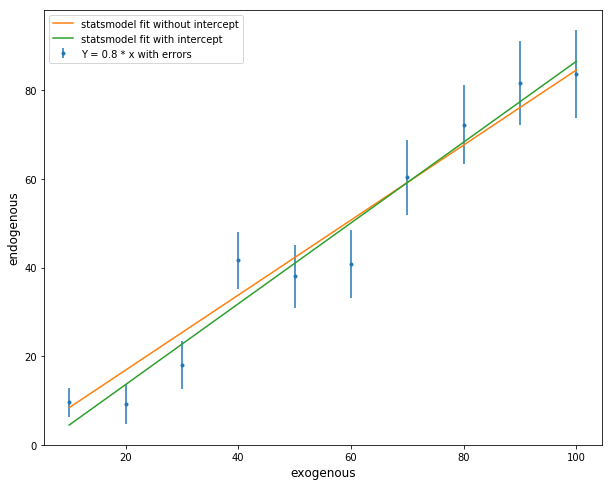

In [63]:
plt.figure(figsize=(10, 8))
plt.errorbar(x, y, yerr=[errors(xx) for xx in x], fmt='.', label = "Y = %s * x with errors"%(slope))
plt.plot(x, smfitW.predict(x), label="statsmodel fit without intercept")
plt.plot(x, smfitR.predict(sm.add_constant(x)), label="statsmodel fit with intercept")
plt.legend(loc="upper left")
plt.xlabel("exogenous", fontsize=12)
plt.ylabel("endogenous", fontsize=12)

# 5. create a line with a chosen slope and a chosen intercept >=100*slope and plot it with uncertainties as errorbars

Text(0,0.5,'endogenous')

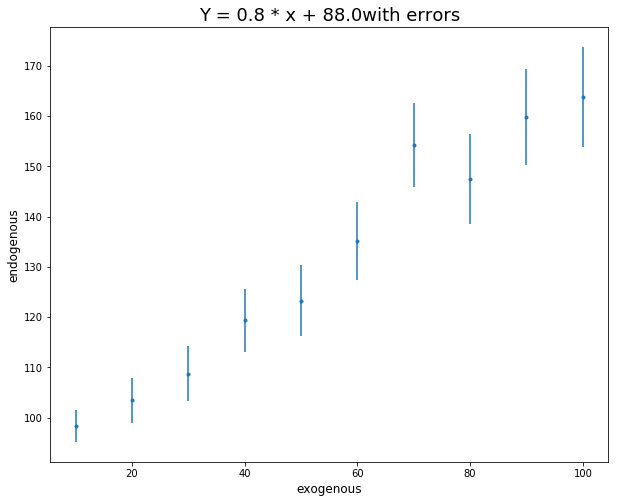

In [64]:
intercept_new = 110 * slope
x = np.linspace(10,100,10)
y = line(slope, x, b=intercept_new, errors=errors)
plt.figure(figsize=(10, 8))
plt.errorbar(x, y, yerr=[errors(xx) for xx in x], fmt='.')
plt.title("Y = %s * x + %swith errors"%(slope, intercept_new), fontsize=18)
plt.xlabel("exogenous", fontsize=12)
plt.ylabel("endogenous", fontsize=12)

# 6. repeat step 3

In [66]:
smfitWrong = smf.OLS(y, x).fit()
smfitWrong.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                     85.84
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           6.73e-06
Time:                        22:42:11   Log-Likelihood:                -51.342
No. Observations:                  10   AIC:                             104.7
Df Residuals:                       9   BIC:                             105.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
x1             2.0441      0.221      9.265      0.000         1.545     2.543
==============================================================================
Omnibus:                        0.455   Durbin-Watson:                   0.118
Prob(Omnibus):                  0.797   Jarque-Bera (JB):                0.480
Skew:                          -0.035   Prob(JB):                        0.787
Kurtosis:                       1.929   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
smfitRight = smf.OLS(y, sm.add_constant(x)).fit()
smfitRight.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                     228.4
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           3.63e-07
Time:                        22:42:52   Log-Likelihood:                -28.566
No. Observations:                  10   AIC:                             61.13
Df Residuals:                       8   BIC:                             61.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         88.2487      3.216     27.439      0.000        80.832    95.665
x1             0.7834      0.052     15.114      0.000         0.664     0.903
==============================================================================
Omnibus:                       13.247   Durbin-Watson:                   2.437
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.392
Skew:                           1.650   Prob(JB):                       0.0409
Kurtosis:                       5.110   Cond. No.                         134.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Under this circumstance, R-square in the right model is larger than the one in the wrong model. It appears that the right model fit the line with an intercept better. 

# 7. now fit the data with WLS weighted least square, a linear fit that takes into account the uncertainties by "down-weighting" (considering less important) observations with large uncertainties

you should at this point ask: how can I create weights from my uncertainties? The answer, as often is the case, is not unique. But a rule of thumb is that the weights would be the _inverse_ (remember: larger error must mean smaller weight) of the variance, with is the standard deviation square. Look at the error() function I create and design your weights array according to this rule

In [70]:
#def errors(x):
#   return np.sqrt(x)
#smf.WLS(endog, exog, weights=1.0, missing='none', hasconst=None, **kwargs)
smfitDoneRight= smf.WLS(y, sm.add_constant(x), weights=[1/sqrt(xx) for xx in x]).fit()
smfitDoneRight.summary()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            WLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     282.2
Date:                Mon, 12 Nov 2018   Prob (F-statistic):           1.60e-07
Time:                        22:53:51   Log-Likelihood:                -27.844
No. Observations:                  10   AIC:                             59.69
Df Residuals:                       8   BIC:                             60.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         88.6421      2.466     35.949      0.000        82.956    94.328
x1             0.7770      0.046     16.798      0.000         0.670     0.884
==============================================================================
Omnibus:                       10.935   Durbin-Watson:                   2.343
Prob(Omnibus):                  0.004   Jarque-Bera (JB):                4.876
Skew:                           1.502   Prob(JB):                       0.0873
Kurtosis:                       4.638   Cond. No.                         98.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Note: you can also use other statsmodels functions, for example statsmodels.formula.api which allows to pass an equation
again, make sure that your formula supports an intercept (no deliverable for this portion, it's up to you to explore the use of this function)

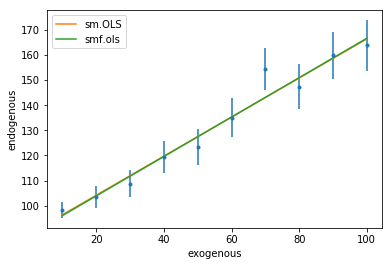

In [71]:
# statsmodels.formula.api accepts dictionaris, pandas dataframes, and python rec arrays as input: 
# all data types that host data paired with labels
smfmodel = smf.ols('y ~ x + const', data={'x':x, 'y':y, 'const':np.ones(len(x))}).fit()
pl.errorbar(x, y, yerr=errors(x), fmt='.')
pl.plot(x, smfitDoneRight.fittedvalues, '-', label="sm.OLS")
pl.plot(x, smfmodel.fittedvalues, '-', label="smf.ols")
pl.xlabel("exogenous")
pl.ylabel("endogenous")
pl.legend();